In [3]:
pip install pandas numpy scikit-learn seaborn matplotlib joblib

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# 1. Data Loading and Initial Exploration
df = pd.read_csv('Cancer_Data.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 2. Data Preprocessing
# Remove unnecessary columns
df = df.drop(['Unnamed: 32', 'id'], axis=1)

# Convert diagnosis to binary values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dataset Shape: (569, 33)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null   

In [5]:
# 3. Model Training and Evaluation
def train_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print results
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return accuracy, model

In [6]:
# Initialize models
models = {
    'Support Vector Machine': SVC(kernel='rbf', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}



Support Vector Machine Results:
Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



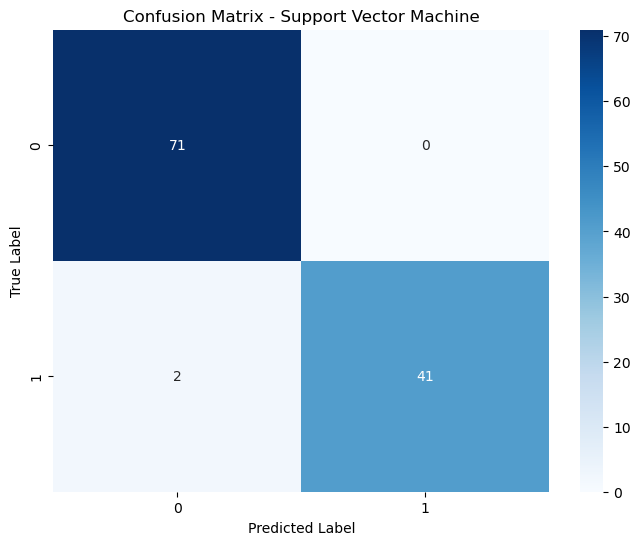


Random Forest Results:
Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



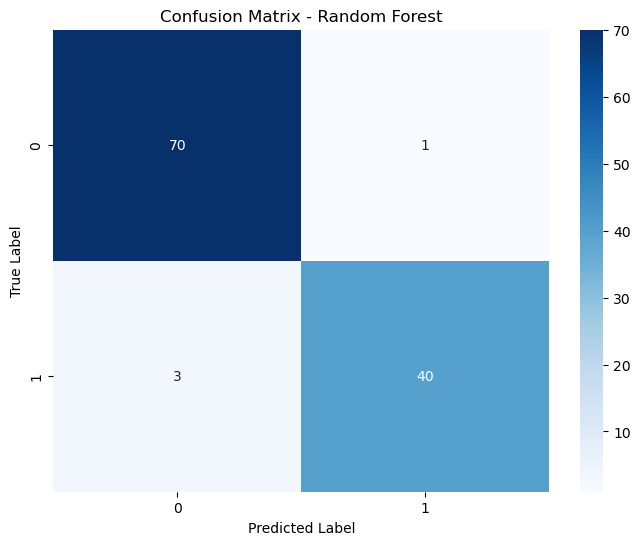


K-Nearest Neighbors Results:
Accuracy: 0.9474

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



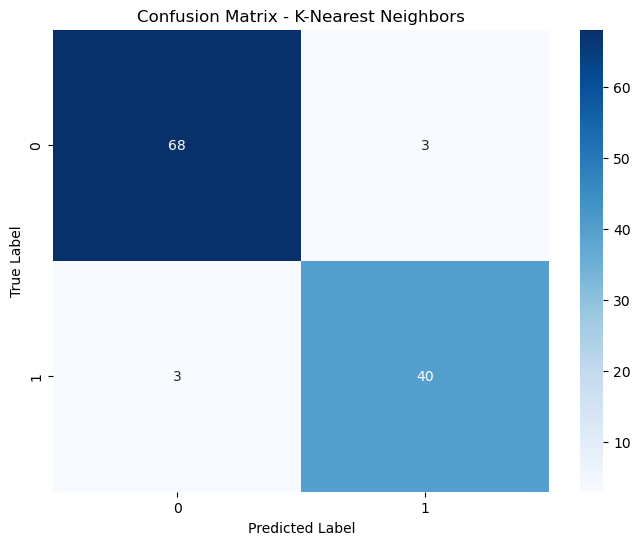


Neural Network Results:
Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



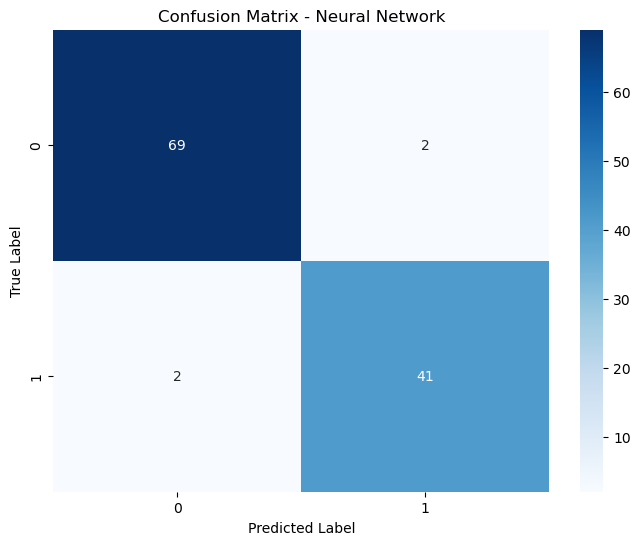

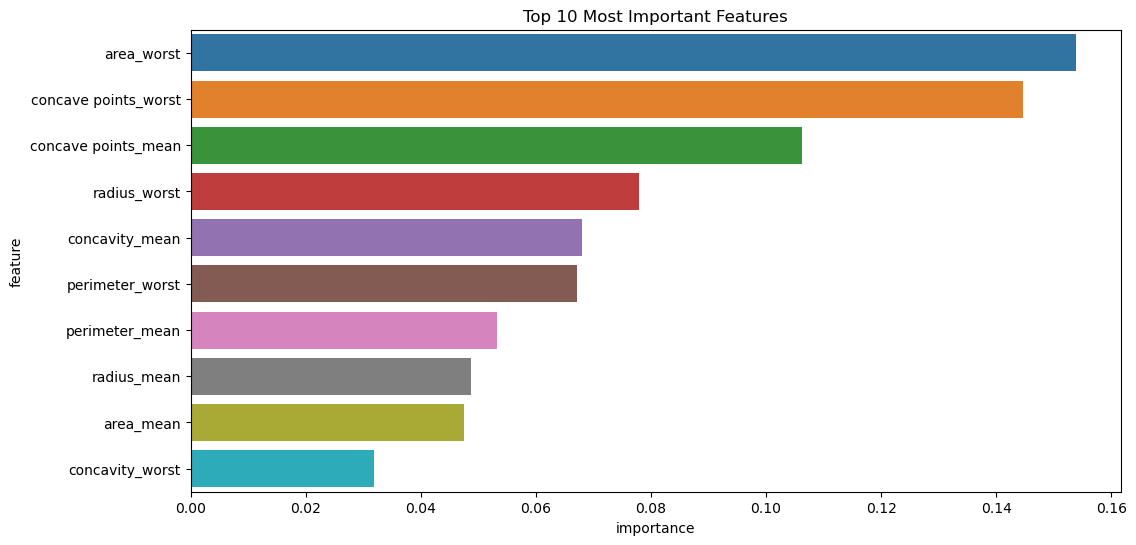

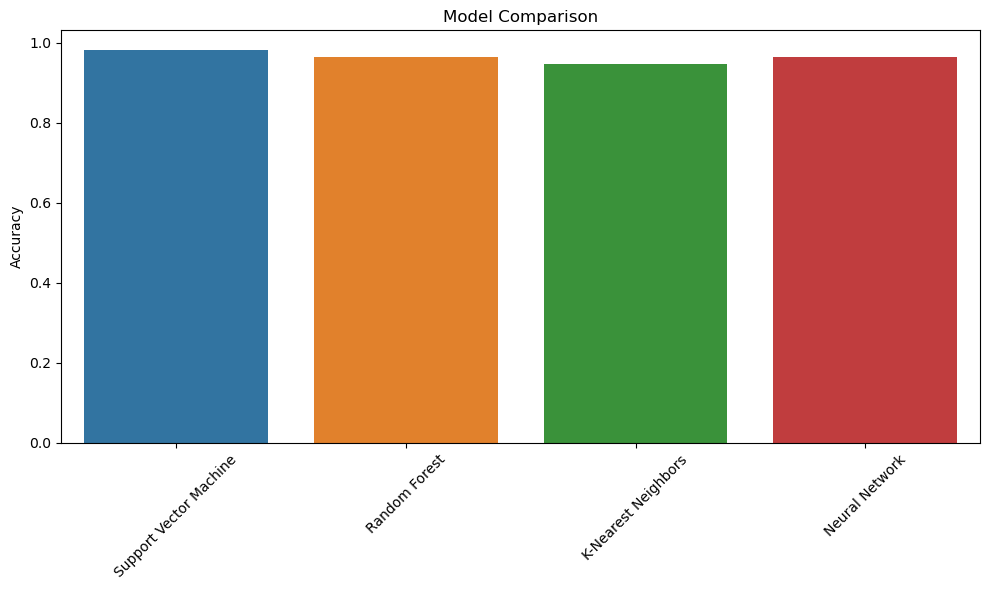

In [7]:
# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    accuracy, trained_model = train_evaluate_model(
        model, X_train_scaled, X_test_scaled, y_train, y_test, name
    )
    results[name] = accuracy

# 4. Feature Importance Analysis (for Random Forest)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

# 5. Model Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [8]:
# 6. Hyperparameter Tuning for the Best Model
# Let's tune the Random Forest as an example
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [9]:
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), 
                      param_grid, 
                      cv=5, 
                      scoring='accuracy',
                      n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

print("\nBest Random Forest Parameters:", rf_grid.best_params_)
print("Best Cross-Validation Score:", rf_grid.best_score_)

# Final evaluation with best model
best_rf = rf_grid.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)
print("\nFinal Model Performance:")
print(classification_report(y_test, y_pred_best))


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.9626373626373625

Final Model Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [11]:
# 7. Save the best model (Optional)
import joblib
joblib.dump(best_rf, 'best_cancer_prediction_model.joblib')

['best_cancer_prediction_model.joblib']